In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Corpus Modification and its Effects on Topic Modeling

# Empirical Results II


### The Task

As laid out by Prof. Jensen...

>    Significantly revise your original results (Report 7), incorporating new results and analyses based on your findings and feedback from the instructor. As with Report 7, briefly review the hypotheses that your analysis is intended to evaluate and the design used. Where the design deviated from your previously stated design (Report 6) or from the first version of your results (Report 7), clearly note the difference.

>    As before, present the results in such a way that the reader can infer their own conclusions, but also present the high-level conclusions that you believe should be drawn from the results. Discuss how the results differ from, or are consistent with, your expectations before the analysis. Discuss the substantive significance of your results, and apply statistical significance tests, where appropriate.

>    This report should a minimum of two pages of single-spaced text. Graphs and tables of results should be used frequently, to supplement textual descriptions of results.

# Review

## Introduction

The intended goal of this project is to explore the effects of corpus modification on the task of topic modeling. Since the goal is not to produce the absolute best topics possible, we have constructed a bare-bones model using SciKit-Learn's Latent Dirichlet Allocation library. We then defined easy-to-measure, easy-to-modify corpus properties and added them as an extension to NLTK's built-in corpus reader object. Our experiments in the previous report involved separately modifying the properties of each corpora and testing the model on the adjusted corpus to compare the effects of the changes. We compared effects using previously defined topic-quality metrics.


## Original Hypothesis

Our hypothesis for the original experiment was that results would follow those observed by Tang et al. That is, we expected to find both upper and lower bounds on the following variables:
- Number of documents
- Document length
- Number of topics <-- new! Introduce this
- Presence of stopwords (i.e. underlying topic separation).
on the number of documents necessary to extract meaningful topics, regardless of document length. We also expected to find  

## Original Design

The original design took multiple corpora and varied several components:
- Number of documents
- Size of documents
- Presence of stopwords

The hypothesis was that 

## Results

## New Design

The new design is going to look primarily at the results on effective size and exclusivity. It will use these as a measure of Euclidean distance between topics and observe its behaviour in response to changes in the number of documents, the size of documents, the presence of stopwords, and now the number of topics. There are four variables meaning 24 possibilities for modifying each variable or keeping each variable constant.

We need to explore more interactions of the variables.

## New Hypothesis

The new hypothesis posits that...

# Experimental Results II

This is how this is gonna work:

1. Choose a corpus
2. Vary number of documents
3. Vary length of documents
4. Vary stopwords presence
5. Measure resulting properties

There's going to be about (exactly?) 15k rows per corpus 

In [167]:
% matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import *

Load the results...

Here's some stuff we're going to need for the plots.

In [168]:
corpora = ['abc_rural','abc_science','brown','wine']

topic_metrics = ['dist_uni','eff_size','exclusivity','rank1']

topic_pair_metrics = ['cos','kld','jsd']

metrics_dict = {"Distance from Uniform":"dist_uni",
                "Effective Size":"eff_size",
                "Exclusivity":"exclusivity",
                "Rank1":"rank1",
                "Cosine Distance":"cos",
                "Kullback-Leibler Divergence":"kld",
                "Jensen-Shannon Divergence":"jsd",
               }

metrics_dict_rev = {"dist_uni":"Distance from Uniform",
                    "eff_size":"Effective Size",
                    "exclusivity":"Exclusivity",
                    "rank1":"Rank1",
                    "cos":"Cosine Distance",
                    "kld":"Kullback-Leibler Divergence",
                    "jsd":"Jensen-Shannon Divergence"}

# Load the individual dataframes
idx = 0
dfs = []
dfs_pairs = []
for i in range(len(corpora)):
    df = pd.read_csv('{}_ind_experiment_{}.csv'.format(corpora[i],idx),index_col=False)
    df_pair = pd.read_csv('{}_pair_experiment_{}.csv'.format(corpora[i],idx),index_col=False)
    df.sw_pres = df.sw_pres.round(2)
    df_pair.sw_pres = df_pair.sw_pres.round(2)
    dfs.append(df)
    dfs_pairs.append(df_pair)

# Number of Documents

Let's explore effects of changing the number of documents while the two other variables (stopwords presence and document length stay somewhat fixed).

<IPython.core.display.Javascript object>


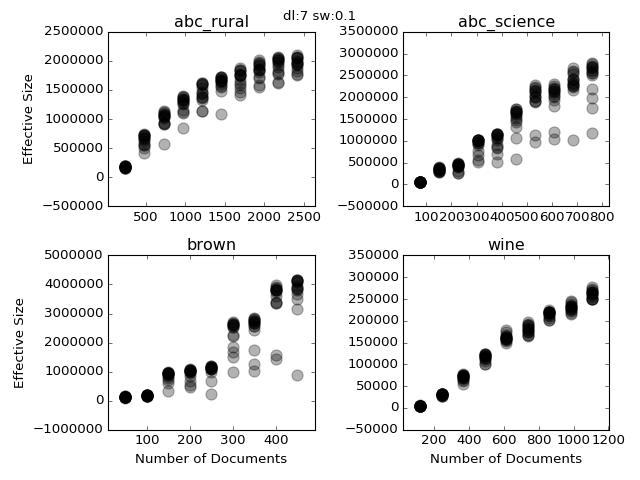

In [169]:
plt.close()

# Build the frame for the plots
f, axarr = plt.subplots(2, 2)
abc_rural_plt = axarr[0, 0]
abc_science_plt = axarr[0, 1]
brown_plt = axarr[1, 0]
wine_plt = axarr[1, 1]
plts = [abc_rural_plt,abc_science_plt,brown_plt,wine_plt]

def clear_plots_nd():
    for i in range(len(plts)):
        plts[i].clear()
        plts[i].set_title(corpora[i])
    plts[2].set_xlabel("Number of Documents")
    plts[3].set_xlabel("Number of Documents")

def update_axes_nd(metric,y_fixed):
    plts[0].set_ylabel("{}".format(metrics_dict_rev[metric]))
    plts[2].set_ylabel("{}".format(metrics_dict_rev[metric]))
    for i in range(len(plts)):
        if metric in topic_metrics:
            df = dfs[i]
        else:
            df = dfs_pairs[i]
        if y_fixed:
            ymin = df[metric].min()
            ymax = df[metric].max()
            ypad = (ymax-ymin)/10
        xmin = df.num_docs.min()
        xmax = df.num_docs.max()
        xpad = (xmax-xmin)/10
        if y_fixed:
            plts[i].set_ylim([ymin-ypad,ymax+ypad])
        plts[i].set_xlim([xmin-xpad,xmax+xpad])
    
def plot_metric_nd(metric,fixed_dl,fixed_sw):
    for i in range(len(plts)):
        if metric in topic_metrics:
            df = dfs[i]
            dl = df.doc_len.unique()[fixed_dl]
            sub = df[(df.doc_len==dl)&(df.sw_pres==fixed_sw)]
            for n in range(df.topic.nunique()):
                topic_sub = sub[sub.topic==n]
                x = topic_sub.num_docs.values
                y = topic_sub[metric].values
                plts[i].scatter(x,y,color="black",alpha=0.3,s=100)
        else:
            df = dfs_pairs[i]
            dl = df.doc_len.unique()[fixed_dl]
            sub = df[(df.doc_len==dl)&(df.sw_pres==fixed_sw)]
            pairs = df.topic_pair.unique()
            for pair in pairs:
                pair_sub = sub[sub.topic_pair==pair]
                x = pair_sub.num_docs.values
                y = pair_sub[metric].values
                plts[i].scatter(x,y,color="black",alpha=0.3,s=100)
    
def update_plots_nd(y_fixed,metric="dist_uni",fixed_dl=4,fixed_sw=0.5):
    clear_plots_nd()
    plot_metric_nd(metric,fixed_dl,fixed_sw)
    update_axes_nd(metric,y_fixed)
    plt.suptitle("dl:{} sw:{}".format(fixed_dl,fixed_sw))
    plt.tight_layout()
    plt.savefig("figures/empirical_results_ii/nd_{}_{}_{}".format(metric,fixed_dl,int(10*fixed_sw)))
    plt.show()

In [170]:
update_plots_nd(True)
interact(update_plots_nd,y_fixed=True,metric=metrics_dict,fixed_dl=(0,8),fixed_sw=(0.0,0.9))

A Jupyter Widget

<function __main__.update_plots_nd>

In [113]:
plt.savefig("figures/empirical_results_ii/nd_exclusivity_4_0_zoom")

# Document Length

<IPython.core.display.Javascript object>


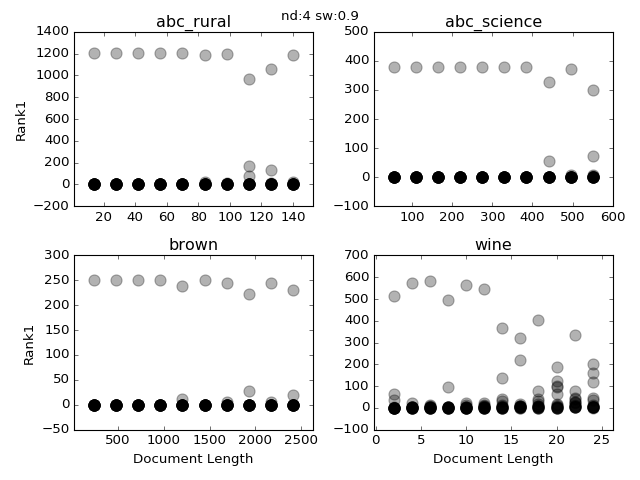

In [157]:
plt.close()

# Build the frame for the plots
f, axarr = plt.subplots(2, 2)
abc_rural_plt = axarr[0, 0]
abc_science_plt = axarr[0, 1]
brown_plt = axarr[1, 0]
wine_plt = axarr[1, 1]
plts = [abc_rural_plt,abc_science_plt,brown_plt,wine_plt]

def clear_plots_dl():
    for i in range(len(plts)):
        plts[i].clear()
        plts[i].set_title(corpora[i])
    plts[2].set_xlabel("Document Length")
    plts[3].set_xlabel("Document Length")

def update_axes_dl(metric,y_fixed):
    plts[0].set_ylabel("{}".format(metrics_dict_rev[metric]))
    plts[2].set_ylabel("{}".format(metrics_dict_rev[metric]))
    for i in range(len(plts)):
        if metric in topic_metrics:
            df = dfs[i]
        else:
            df = dfs_pairs[i]
        if y_fixed:
            ymin = df[metric].min()
            ymax = df[metric].max()
            ypad = (ymax-ymin)/10
        xmin = df.doc_len.min()
        xmax = df.doc_len.max()
        xpad = (xmax-xmin)/10
        if y_fixed:
            plts[i].set_ylim([ymin-ypad,ymax+ypad])
        plts[i].set_xlim([xmin-xpad,xmax+xpad])
    
def plot_metric_dl(metric,fixed_nd,fixed_sw):
    for i in range(len(plts)):
        if metric in topic_metrics:
            df = dfs[i]
            nd = df.num_docs.unique()[fixed_nd]
            sub = df[(df.num_docs==nd)&(df.sw_pres==fixed_sw)]
            for n in range(df.topic.nunique()):
                topic_sub = sub[sub.topic==n]
                x = topic_sub.doc_len.values
                y = topic_sub[metric].values
                plts[i].scatter(x,y,color="black",alpha=0.3,s=100)
        else:
            df = dfs_pairs[i]
            nd = df.num_docs.unique()[fixed_nd]
            pairs = df.topic_pair.unique()
            sub = df[(df.num_docs==nd)&(df.sw_pres==fixed_sw)]
            for pair in pairs:
                pair_sub = sub[sub.topic_pair==pair]
                x = pair_sub.doc_len.values
                y = pair_sub[metric].values
                plts[i].scatter(x,y,color="black",alpha=0.3,s=100)
    
def update_plots_dl(y_fixed,metric="dist_uni",fixed_nd=4,fixed_sw=0.5):
    clear_plots_dl()
    plot_metric_dl(metric,fixed_nd,fixed_sw)
    update_axes_dl(metric,y_fixed)
    plt.suptitle("nd:{} sw:{}".format(fixed_nd,fixed_sw))
    plt.tight_layout()
    plt.savefig("figures/empirical_results_ii/dl_{}_{}_{}".format(metric,fixed_nd,int(10*fixed_sw)))
    plt.show()

In [158]:
update_plots_dl(True)
interact(update_plots_dl,y_fixed=True,metric=metrics_dict,fixed_nd=(0,8),fixed_sw=(0.0,0.9))

A Jupyter Widget

<function __main__.update_plots_dl>

In [116]:
plt.savefig("figures/empirical_results_ii/dl_exclusivity_4_3_zoom")

# Stopword Presence

Now let's focus on changing only the stopword presence

<IPython.core.display.Javascript object>


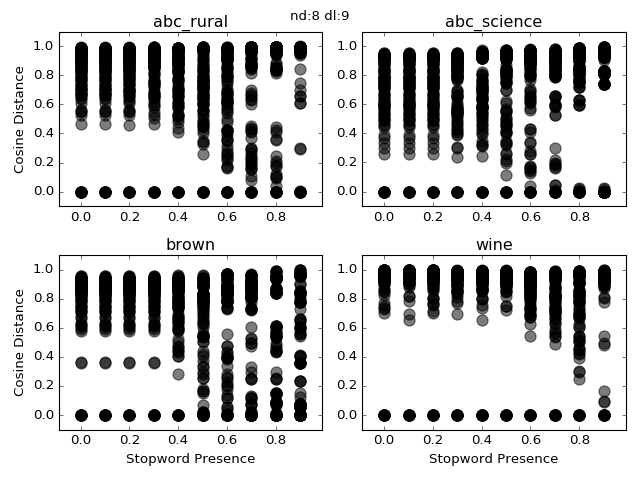

In [159]:
plt.close()

# Build the frame for the plots
f, axarr = plt.subplots(2, 2)
abc_rural_plt = axarr[0, 0]
abc_science_plt = axarr[0, 1]
brown_plt = axarr[1, 0]
wine_plt = axarr[1, 1]
plts = [abc_rural_plt,abc_science_plt,brown_plt,wine_plt]

def clear_plots_sw():
    for i in range(len(plts)):
        plts[i].clear()
        plts[i].set_title(corpora[i])
    plts[2].set_xlabel("Stopword Presence")
    plts[3].set_xlabel("Stopword Presence")

def update_axes_sw(metric,y_fixed):
    plts[0].set_ylabel("{}".format(metrics_dict_rev[metric]))
    plts[2].set_ylabel("{}".format(metrics_dict_rev[metric]))
    for i in range(len(plts)):
        if metric in topic_metrics:
            df = dfs[i]
        else:
            df = dfs_pairs[i]
        if y_fixed:
            ymin = df[metric].min()
            ymax = df[metric].max()
            ypad = (ymax-ymin)/10
        xmin = df.sw_pres.min()
        xmax = df.sw_pres.max()
        xpad = (xmax-xmin)/10
        if y_fixed:
            plts[i].set_ylim([ymin-ypad,ymax+ypad])
        plts[i].set_xlim([xmin-xpad,xmax+xpad])
    
def plot_metric_sw(metric,fixed_nd,fixed_dl):
    for i in range(len(plts)):
        if metric in topic_metrics:
            df = dfs[i]
            dl = df.doc_len.unique()[fixed_dl]
            nd = df.num_docs.unique()[fixed_nd]
            sub = df[(df.num_docs==nd)&(df.doc_len==dl)]
            for n in range(df.topic.nunique()):
                topic_sub = sub[sub.topic==n]
                x = topic_sub.sw_pres.values
                y = topic_sub[metric].values
                plts[i].scatter(x,y,color="black",alpha=0.3,s=100)
        else:
            df = dfs_pairs[i]
            dl = df.doc_len.unique()[fixed_dl]
            nd = df.num_docs.unique()[fixed_nd]
            sub = df[(df.num_docs==nd)&(df.doc_len==dl)]
            pairs = df.topic_pair.unique()
            for pair in pairs:
                pair_sub = sub[sub.topic_pair==pair]
                x = pair_sub.sw_pres.values
                y = pair_sub[metric].values
                plts[i].scatter(x,y,color="black",alpha=0.3,s=100)
    
def update_plots_sw(y_fixed,metric="dist_uni",fixed_nd=4,fixed_dl=4):
    clear_plots_sw()
    plot_metric_sw(metric,fixed_nd,fixed_dl)
    update_axes_sw(metric,y_fixed)
    plt.suptitle("nd:{} dl:{}".format(fixed_nd,fixed_dl))
    plt.tight_layout()
    plt.savefig("figures/empirical_results_ii/sw_{}_{}_{}".format(metric,fixed_nd,fixed_dl))
    plt.show()

In [160]:
update_plots_sw(True)
interact(update_plots_sw,y_fixed=False,metric=metrics_dict,fixed_nd=(0,8),fixed_dl=(0,9))

A Jupyter Widget

<function __main__.update_plots_sw>

In [99]:
plt.savefig("figures/empirical_results_ii/sw_jsd_4_8")

In [129]:
dfs[2][dfs[2].dist_uni>6000000]

,num_docs,doc_len,sw_pres,topic,top_words,dist_uni,eff_size,exclusivity,rank1
5238,200,1205.0,0.9,3,just_having_don,6.031551e+06,2.290151e+04,63.273911,199
5397,200,1446.0,0.9,12,theirs_just_does,6.354107e+06,7.785756e+03,131.462017,200
5541,200,1687.0,0.9,6,just_did_does,6.633398e+06,7.629903e+03,215.592111,200
5691,200,1928.0,0.9,6,having_does_just,6.918687e+06,7.398536e+03,1101.921921,200
5842,200,2169.0,0.9,7,did_just_having,7.095062e+06,2.316443e+04,97.331302,200
5996,200,2410.0,0.9,11,just_did_don,7.442650e+06,7.554389e+03,257.695527,200
6442,250,723.0,0.9,7,theirs_having_does,6.108698e+06,6.406354e+03,545.451780,250
6586,250,964.0,0.9,1,did_does_having,6.374378e+06,8.390207e+03,69.592280,250
6742,250,1205.0,0.9,7,just_did_having,6.492828e+06,3.146042e+04,36.438777,239
6886,250,1446.0,0.9,1,don_did_theirs,7.054315e+06,1.327905e+04,92.623585,250
